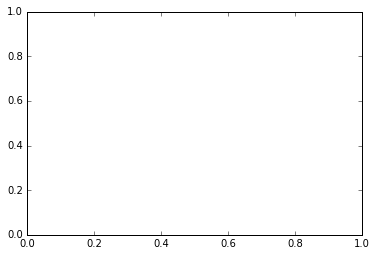

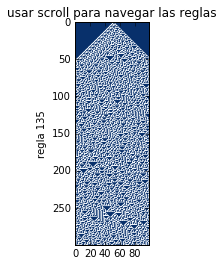

In [2]:
import ipywidgets as widgets
sli = widgets.IntSlider(
    value=60,
    min=0,
    max=255,
    step=1,
    description='AC rule:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
sli

""" Genera una matriz 3D de los 256 autómatas celulares elementales, navegables con scroll. """

import numpy
from matplotlib.pyplot import figure, show
from matplotlib import cm

class AC:
    def __init__(self, ax, ary):
        self.ax = ax
        self.X = ary
        ax.set_title("usar scroll para navegar las reglas")
        r, c, self.slices = ary.shape
        self.ind = 135
        self.im = ax.imshow(self.X[:, :, self.ind], cmap=cm.Blues)
        self.update()

    def onscroll(self, event):
        if event.button == 'up':
            self.ind = numpy.clip((self.ind + 1) % 256, 0, self.slices - 1)
        else:
            self.ind = numpy.clip((self.ind - 1) % 256, 0, self.slices - 1)
        self.update()

    def update(self):
        self.im.set_data(self.X[:, :, self.ind])
        self.ax.set_ylabel("regla %.0d" % self.ind)
        self.im.axes.figure.canvas.draw()


def f(x, y, z, regla):
    return regla & (1 << (x << 2 | y << 1 | z))


def genera_ac(mx, my, inicio="central"):
    fig = figure()
    ax = fig.add_subplot(111)
    E = numpy.zeros((mx, my, 256), dtype=numpy.bool_)
    if inicio == "central":
        E[0, int(my / 2), :] = 1  # 1 central
    elif inicio[0] in ['0','1']:
        my = len(inicio)
        E = numpy.zeros((mx, my, 256), dtype=numpy.bool_)
        for r in range(256):
            E[0, :, r] = numpy.array(list(inicio))
    else:
        E[0, :, :] = numpy.round(numpy.random.rand(1, my, 256))  # renglón aleatorio
    for r in range(256):
        for i in range(1, mx):
            for j in range(1, my - 1):
                E[i, j, r] = f(E[i - 1, j - 1, r], E[i - 1, j, r], E[i - 1, j + 1, r], r)
            E[i, 0, r] = f(E[i - 1, my - 1, r], E[i - 1, 0, r], E[i - 1, 1, r],r) #ahorra un seg separar estos 2 casos
            E[i, my - 1, r] = f(E[i - 1, my - 2, r], E[i - 1, my - 1, r], E[i - 1, 0, r],r)
    ac = AC(ax, E)
    fig.canvas.mpl_connect("scroll_event", ac.onscroll)
    show()

genera_ac(300, 100, "central")
#genera_ac(20, 100, "1000110110001101")

#interesantes: 30,54,60,62,90,94,102,110,122,126,150,158,182,188,190,220,222,250